<a href="https://colab.research.google.com/github/hariharannatesh/Dimension-Estimation-from-Depth-Map-of-Monocular-Image/blob/master/CNN_dimest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
a = []
while(1):
  a.append(1)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import argparse
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


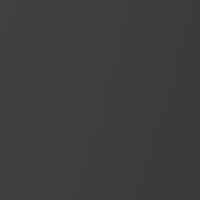

59.0


In [0]:
X_pos=np.load('gdrive/My Drive/Dataset/images_depth_positive.npy')
X_pos=np.reshape(X_pos,(1276,200,200,1))
cv2_imshow(X_pos[1])
X_pos=X_pos/255.0
Y_pos=np.load('gdrive/My Drive/Dataset/target_depth_positive.npy')
print(Y_pos[1])
# Y=Y/200

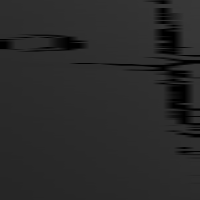

152.0


In [0]:
X=np.load('gdrive/My Drive/Dataset/images_depth_negative.npy')
X=np.reshape(X,(1279,200,200,1))
cv2_imshow(X[1])
X=X/255.0
Y=np.load('gdrive/My Drive/Dataset/target_depth_negative.npy')
print(Y[1])

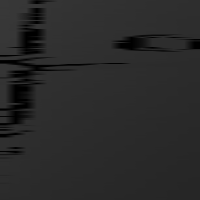

152.0


In [0]:
X_neg=np.load('gdrive/My Drive/Dataset/images_depth_negative.npy')
for i in range(len(X_neg)):
  X_neg[i]=cv2.flip(X_neg[i],1)
X_neg=np.reshape(X_neg,(1279,200,200,1))
cv2_imshow(X_neg[1])
X_neg=X_neg/255.0
Y_neg=np.load('gdrive/My Drive/Dataset/target_depth_negative.npy')
print(Y_neg[1])

In [0]:
X=np.concatenate((X_pos,X_neg),axis=0)
Y=np.concatenate((Y_pos,Y_neg),axis=0)
print(len(X),len(Y))

2555 2555


In [0]:
X_new=[]
X_new=np.asarray(X_new)
Y_new=[]
Y_new=np.asarray(Y_new)
count=0
for i in range(len(X)):
  for j in range ((i+1),len(X)):
    if(not(np.array_equal(X[i],X[j]))):
      count=1
    else:
      count=0
  if(count==1):
    X_new=np.append(X_new,X[i])
    Y_new=np.append(Y_new,Y[i])
      


In [0]:
X,Y=shuffle(X,Y)
X_new=X[0:1277]
X_rest=X[1277:len(X)]
Y_new=Y[0:1277]
Y_rest=Y[1277:len(Y)]
print(len(X_new))
print(len(Y_new))
print(len(X_rest))

1277
1277
1278


In [0]:
(trainX,testX,trainY,testY)=train_test_split(X_new,Y_new,test_size=0.2,random_state=73)
print(trainX[0].shape)
print(len(trainY))
print(trainY[0])

(200, 200, 1)
1021
60.0


In [0]:
model=models.Sequential()

In [0]:
model.add(Conv2D(16,(11,11),padding="same",data_format='channels_last',input_shape=(200,200,1),use_bias=True,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(axis=2))
model.add(Conv2D(32,(7,7),padding="same",data_format='channels_last',use_bias=True,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(axis=2))
model.add(Conv2D(64,(5,5),padding="same",data_format='channels_last',use_bias=True,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization(axis=2))
#model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
#model.add(Conv2D(128,(3,3),padding="same",data_format='channels_last',use_bias=True,activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      1952      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      25120     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        5

In [0]:
model.add(Flatten())
#model.add(Dense(10000,activation='relu',use_bias=True))
model.add(Dense(1000,activation='relu',use_bias=True))
model.add(Dense(100,activation='relu',use_bias=True))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      1952      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      25120     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        5

In [0]:
checkpoint_path = "gdrive/My Drive/training/cpbn_mix_pos500.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [0]:
cp_callback = ModelCheckpoint(filepath=checkpoint_path,verbose=1,save_weights_only=True)

In [0]:
model.save_weights(checkpoint_path.format(epoch=0))

In [0]:
model.load_weights(checkpoint_path)

In [0]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.MeanSquaredError(),metrics=['mean_squared_error'])
history=model.fit(trainX,trainY,initial_epoch=412,epochs=500,shuffle=1,validation_split=0.2,callbacks=[cp_callback])

Epoch 413/500
26/26 [==============================] - ETA: 0s - loss: 256.4176 - mean_squared_error: 256.0977
Epoch 00413: saving model to gdrive/My Drive/training/cpbn_mix_pos500.ckpt
26/26 [==============================] - 25s 950ms/step - loss: 256.4176 - mean_squared_error: 256.0977 - val_loss: 376.6798 - val_mean_squared_error: 395.0449
Epoch 414/500
26/26 [==============================] - ETA: 0s - loss: 211.6191 - mean_squared_error: 213.3567
Epoch 00414: saving model to gdrive/My Drive/training/cpbn_mix_pos500.ckpt
26/26 [==============================] - 24s 933ms/step - loss: 211.6191 - mean_squared_error: 213.3567 - val_loss: 405.4696 - val_mean_squared_error: 404.1830
Epoch 415/500
26/26 [==============================] - ETA: 0s - loss: 229.4209 - mean_squared_error: 231.7070
Epoch 00415: saving model to gdrive/My Drive/training/cpbn_mix_pos500.ckpt
26/26 [==============================] - 24s 940ms/step - loss: 229.4209 - mean_squared_error: 231.7070 - val_loss: 317.14

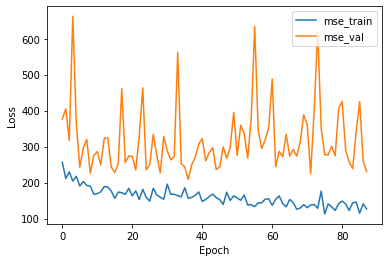

In [0]:

plt.plot(history.history['loss'],label='mse_train')
plt.plot(history.history['val_loss'],label='mse_val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim(0,15000)
plt.legend(loc='upper right')

In [0]:
print(testY[2])

94.0


In [0]:
y_pred=model.predict(testX[2].reshape(1,200,200,1))
print(y_pred)

[[96.36484]]


In [0]:
!mkdir -p save_model

In [0]:
model.save('gdrive/My Drive/save_model/posbnmix_model_500.h5')

In [0]:
new_model=load_model('gdrive/My Drive/save_model/posbnmix_model_500.h5')

In [0]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      1952      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      25120     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        200       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        5

In [0]:
new_model.evaluate(x=X_rest,y=Y_rest)

40/40 [==============================] - 2s 62ms/step - loss: 263.4232 - mean_squared_error: 263.5377


[263.4231872558594, 263.53765869140625]

In [0]:
new_model.evaluate(x=testX,y=testY)


8/8 [==============================] - 0s 56ms/step - loss: 376.4387 - mean_squared_error: 376.4387


[376.438720703125, 376.438720703125]

In [0]:
predicted= new_model.predict(X_rest)

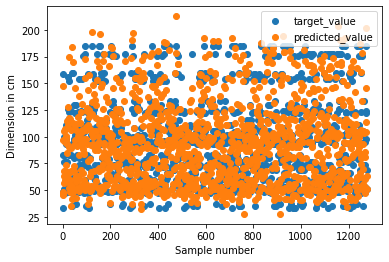

In [0]:
plt.scatter(range(len(X_rest)),Y_rest,label='target_value')
plt.scatter(range(len(X_rest)),predicted,label='predicted_value')
plt.xlabel('Sample number')
plt.ylabel('Dimension in cm')
plt.legend(loc='upper right')

In [0]:
y_pred_10=new_model.predict(X_rest[10].reshape(1,200,200,1))
y_pred_97=new_model.predict(X_rest[97].reshape(1,200,200,1))
y_pred_1000=new_model.predict(X_rest[1000].reshape(1,200,200,1))
y_pred_579=new_model.predict(X_rest[579].reshape(1,200,200,1))
y_pred_477=new_model.predict(X_rest[477].reshape(1,200,200,1))
y_pred_919=new_model.predict(X_rest[919].reshape(1,200,200,1))
y_pred_176=new_model.predict(X_rest[176].reshape(1,200,200,1))
y_pred_213=new_model.predict(X_rest[213].reshape(1,200,200,1))
y_pred_845=new_model.predict(X_rest[845].reshape(1,200,200,1))
y_pred_623=new_model.predict(X_rest[623].reshape(1,200,200,1))
print(Y_rest[10],y_pred_10)
print(Y_rest[97],y_pred_97)
print(Y_rest[1000],y_pred_1000)
print(Y_rest[579],y_pred_579)
print(Y_rest[477],y_pred_477)
print(Y_rest[919],y_pred_919)
print(Y_rest[176],y_pred_176)
print(Y_rest[213],y_pred_213)
print(Y_rest[845],y_pred_845)
print(Y_rest[623],y_pred_623)

51.0 [[59.592648]]
76.0 [[106.46347]]
69.0 [[69.52955]]
49.0 [[47.251884]]
159.0 [[212.81496]]
95.0 [[94.50242]]
98.0 [[94.21628]]
177.0 [[175.33412]]
105.0 [[107.58286]]
124.0 [[128.81123]]


In [0]:
predicted=new_model.predict(testX)

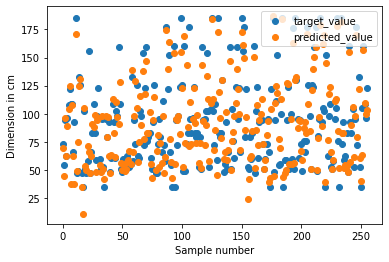

In [0]:
plt.scatter(range(len(testX)),testY,label='target_value')
plt.scatter(range(len(testX)),predicted,label='predicted_value')
plt.xlabel('Sample number')
plt.ylabel('Dimension in cm')
plt.legend(loc='upper right')

In [0]:
y_pred=new_model.predict(testX[2].reshape(1,200,200,1))
print(y_pred)

[[120.06555]]


In [0]:
new_model2=load_model('gdrive/My Drive/save_model/positive_model_500.h5')
new_model2.summary()

In [0]:
new_model2.evaluate(x=testX,y=testY)

8/8 [==============================] - 0s 54ms/step - loss: 291.6156 - mean_squared_error: 291.6156


[291.6156005859375, 291.6156005859375]